In [2]:
#Importacion de las librerias
import pandas as pd
import os
import matplotlib.pyplot as plt

#Para el analisis de sentimiento
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentAnalyzer

## Carga de Dataframe

In [3]:
df1 = pd.read_csv(r'dataframe\df1.csv')
df = pd.read_csv(r'dataframe\df.csv')

## Funcion 1



- def developer( desarrollador : str ):<br> 
Cantidad de items y porcentaje de contenido Free por año según empresa desarrolladora.<br> 
- Ejemplo de retorno:

In [197]:
#df1.rename(columns={'release_year': 'Añio'}, inplace=True)
df1.columns

Index(['title', 'id', 'developer', 'Añio', 'price'], dtype='object')

In [7]:
def developer( desarrollador : str ):

      #daraframe filtrando el desarrollador, agrupado por ano y contando los juegos por ano
      df_total = df1[df1['developer']==desarrollador].groupby(['Añio'])['id'].count()

      #daraframe filtrando el desarrollador y juego free,  agrupado por año y contando los juegos por año
      df_free = df1[(df1['developer']==desarrollador) & (df1['price']==0)].groupby(['Añio'])['id'].count()

      #Se crea une el dataframe total con los que salen gratis
      df_nuevo = pd.merge(df_total,df_free, on='Añio', how='left' )

      #Llena con ceros los valores NAN
      df_nuevo.fillna(0, inplace=True)

      #Crea la columna de porcentaje de contenido gratis
      df_nuevo['Contenido Free'] = round(df_nuevo['id_y']*100/df_nuevo['id_x'],0)

      #Borra la columna id_y
      df_nuevo.drop(['id_y'], axis=1, inplace=True)

      #Renombra la columna id_x
      df_nuevo.rename(columns={ 'id_x': 'Cantidad de Items'}, inplace=True)

      #Transforma lo que arroja el groupby por un dataframe "real"
      df_nuevo = df_nuevo.reset_index()

      #transforma la columna contenido Free a integer
      df_nuevo['Contenido Free'] = df_nuevo['Contenido Free'].astype('int')

      #Agrega porcentaje % a la columna contenido free
      df_nuevo['Contenido Free'] = df_nuevo['Contenido Free'].map(lambda x: f'{x}%')

      #Quita los indices naturales de los dataframe que aparecen a la izquierda
      #Pense se mostraba un datafame
      #print(df_nuevo.to_string(index=False))

      #Pregunte como se deberia mostrar la informacion y me dijeron que lo hiciera en un diccionario
      lista = []
      for i in range(0, len(df_nuevo)):
            dic={'Añio':df_nuevo.iloc[i][0] ,
                 'Cantidad de Items': df_nuevo.iloc[i][1] , 
                 'Contenido Free': df_nuevo.iloc[i][2] }
            
            lista.append(dic)

      return lista

In [8]:
developer('Valve')

[{'Añio': 1998, 'Cantidad de Items': 1, 'Contenido Free': '0%'},
 {'Añio': 1999, 'Cantidad de Items': 1, 'Contenido Free': '0%'},
 {'Añio': 2000, 'Cantidad de Items': 2, 'Contenido Free': '0%'},
 {'Añio': 2001, 'Cantidad de Items': 1, 'Contenido Free': '0%'},
 {'Añio': 2003, 'Cantidad de Items': 1, 'Contenido Free': '0%'},
 {'Añio': 2004, 'Cantidad de Items': 5, 'Contenido Free': '0%'},
 {'Añio': 2006, 'Cantidad de Items': 2, 'Contenido Free': '0%'},
 {'Añio': 2007, 'Cantidad de Items': 3, 'Contenido Free': '33%'},
 {'Añio': 2008, 'Cantidad de Items': 1, 'Contenido Free': '0%'},
 {'Añio': 2009, 'Cantidad de Items': 1, 'Contenido Free': '0%'},
 {'Añio': 2010, 'Cantidad de Items': 2, 'Contenido Free': '50%'},
 {'Añio': 2011, 'Cantidad de Items': 1, 'Contenido Free': '0%'},
 {'Añio': 2012, 'Cantidad de Items': 1, 'Contenido Free': '0%'},
 {'Añio': 2017, 'Cantidad de Items': 2, 'Contenido Free': '0%'}]

## Funcion 2

- def userdata( User_id : str ):<br> 
Debe devolver cantidad de dinero gastado por el usuario, el porcentaje <br>
 de recomendación en base a reviews.recommend y cantidad de items.<br>
- Ejemplo de retorno: <br>
{"Usuario X" : us213ndjss09sdf, "Dinero gastado": 200 USD, "% de recomendación": 20%, "cantidad de items": 5}

In [200]:
def userdata( User_id : str ):

    #Filtra los datos del user_id
    df_nuevo = df[df['user_id']== User_id]

    #Dinero gastado por el usuario
    Gasto = df_nuevo['price'].sum()

    #Cantidad de items comprados
    n_items = df_nuevo['item_name'].count()

    #Cantida de Juegos recomendados
    n_reco = df_nuevo['recommend'].sum()

    #Muestra los resultados en un diccionario y con el formato adecuado
    dic = {"Usuario X" : User_id, "Dinero gastado": '{:,.2f} USD'.format(Gasto), 
         "% de recomendación": '{:,.1f} %'.format(n_reco*100/n_items),
         "cantidad de items": n_items}

    return print(dic)

In [201]:
userdata('76561197970982479')

{'Usuario X': '76561197970982479', 'Dinero gastado': '29.98 USD', '% de recomendación': '100.0 %', 'cantidad de items': 2}


## Funcion 3

- def UserForGenre( genero : str ):<br> 
Debe devolver el usuario que acumula más horas jugadas para el género<br> 
dado y una lista de la acumulación de horas jugadas por año de lanzamiento.<br>
- Ejemplo de retorno: {"Usuario con más horas jugadas para Género X" : us213ndjss09sdf, <br>
"Horas jugadas":[{Año: 2013, Horas: 203}, {Año: 2012, Horas: 100}, {Año: 2011, Horas: 23}]}

In [202]:
def UserForGenre(genero : str):
    genero = genero.lower()
    genero = genero.title()
    max_horas_ano = None
    max_horas = 0
    max_user = None  # Nuevo: mantener un registro del usuario con más horas jugadas
    horas_por_ano = {}
    
    for index, row in df.iterrows():
        if genero in row['genres']:

            # Obtener el año de la fecha de lanzamiento
            year = row['release_year']
            
            # Sumar las horas jugadas
            horas_jugadas = row['playtime_forever']
            
            if year not in horas_por_ano:
                horas_por_ano[year] = 0
                
            horas_por_ano[year] += horas_jugadas
            
            if horas_por_ano[year] > max_horas:
                max_horas = horas_por_ano[year]
                max_horas_ano = year
                max_user = row['item_id_x']
                
    #Para mostrar de manera adecuada
    lista=[]
    
    for i,k in enumerate(horas_por_ano):
        dic = {'Año':k, 'Horas':horas_por_ano[k]}
        lista.append(dic)            
    
    res = {
        
        "Usuario con más horas jugadas para Género X": max_user, 
        "Horas jugadas": lista
         
    }
            
    return res
    

In [203]:
UserForGenre('Action')

{'Usuario con más horas jugadas para Género X': 730,
 'Horas jugadas': [{'Año': 2009, 'Horas': 2083426.0},
  {'Año': 2014, 'Horas': 4958697.0},
  {'Año': 2011, 'Horas': 3406585.0},
  {'Año': 2012, 'Horas': 9780509.0},
  {'Año': 2016, 'Horas': 1598558.0},
  {'Año': 2013, 'Horas': 7400872.0},
  {'Año': 2004, 'Horas': 949003.0},
  {'Año': 2007, 'Horas': 5569545.0},
  {'Año': 2017, 'Horas': 2066353.0},
  {'Año': 2010, 'Horas': 1248848.0},
  {'Año': 2015, 'Horas': 3199116.0},
  {'Año': 2002, 'Horas': 5066.0},
  {'Año': 2006, 'Horas': 195114.0},
  {'Año': 1995, 'Horas': 8811.0},
  {'Año': 2003, 'Horas': 381631.0},
  {'Año': 1998, 'Horas': 33208.0},
  {'Año': 2005, 'Horas': 200186.0},
  {'Año': 2008, 'Horas': 568260.0},
  {'Año': 1990, 'Horas': 22675.0},
  {'Año': 1999, 'Horas': 164897.0},
  {'Año': 2000, 'Horas': 265964.0},
  {'Año': 2001, 'Horas': 2748.0},
  {'Año': 1997, 'Horas': 12134.0},
  {'Año': 1994, 'Horas': 1377.0},
  {'Año': 1993, 'Horas': 7.0},
  {'Año': 1992, 'Horas': 855.0},
  {

## Funcion 4

- def best_developer_year( año : int ):<br> 
Devuelve el top 3 de desarrolladores con juegos MÁS recomendados por usuarios para el año dado.<br>
 (reviews.recommend = True y comentarios positivos)<br>
- Ejemplo de retorno: [{"Puesto 1" : X}, {"Puesto 2" : Y},{"Puesto 3" : Z}]

In [204]:
def best_developer_year(year: int):
    # Verificar si el año es igual a -1 y mostrar un mensaje personalizado
    if year == -1:
        return "El año ingresado es -1, lo cual no es válido."

    # Verificar que el año sea un número entero
    if not isinstance(year, int):
        return "El año debe ser un número entero."

    # Verificar que el año ingresado esté en la columna 'year_integer'
    if year not in df['posted_year'].unique():
        return "El año no se encuentra en la columna 'posted_year'."

    # Filtrar el dataset para obtener solo las filas correspondientes al año dado
    juegos_del_año = df[df['posted_year'] == year]

    # Calcular la cantidad de recomendaciones para cada juego
    recomendaciones_por_juego = juegos_del_año.groupby('developer')['recommend'].sum().reset_index()

    # Ordenar los juegos por la cantidad de recomendaciones en orden descendente
    juegos_ordenados = recomendaciones_por_juego.sort_values(by='recommend', ascending=False)

    # Tomar los tres primeros lugares
    primer_puesto = juegos_ordenados.iloc[0]['developer']
    segundo_puesto = juegos_ordenados.iloc[1]['developer']
    tercer_puesto = juegos_ordenados.iloc[2]['developer']

    # Crear el diccionario con los tres primeros lugares
    top_tres = [
        {"Puesto 1": primer_puesto},
        {"Puesto 2": segundo_puesto},
        {"Puesto 3": tercer_puesto}
    ]

    return top_tres

In [205]:
best_developer_year(2011)

[{'Puesto 1': 'Valve'},
 {'Puesto 2': 'Re-Logic'},
 {'Puesto 3': 'Tripwire Interactive'}]

## Analisis de Sentimiento

- def developer_reviews_analysis( desarrolladora : str ):<br> 
Según el desarrollador,se devuelve un diccionario con el nombre del desarrollador como<br>
llave y una lista con la cantidad total de registros de reseñas de usuarios que se encuentren<br>
categorizados con un análisis de sentimiento como valor positivo o negativo.<br>
- Ejemplo de retorno: {'Valve' : [Negative = 182, Positive = 278]}

#### Analisis de sentimiento del dataframe

In [206]:
#Crear una instancia del analizador de sentimientos
sia = SentimentIntensityAnalyzer()

#'reviews' es la columna que se quiere analizar
for index, row in df.iterrows():
    text = str(row['review'])
    sentiment_scores = sia.polarity_scores(text)

    #Extraer los puntajes de sentimiento
    compound_score = sentiment_scores['compound']

    #Puedes hacer algo con el puntaje compuesto aquí
    if compound_score >= 0:
        sentiment_label = 'Positive'
    else:
        sentiment_label = 'Negative'


    #Guardar el resultado en una nueva columna 
    df.at[index, 'sentiment_analysis'] = sentiment_label

#Se le agrega una nueva columna al DataFrame, llamada 'sentiment_analysis' con las etiquetas de sentimiento

#### Guarda la columna sentimen_analysis en el archivo **df.csv**

In [207]:
df.to_csv(os.path.join('dataframe','df.csv'), index=False)

##### Gráfica de barras de los valores positivos y negativos

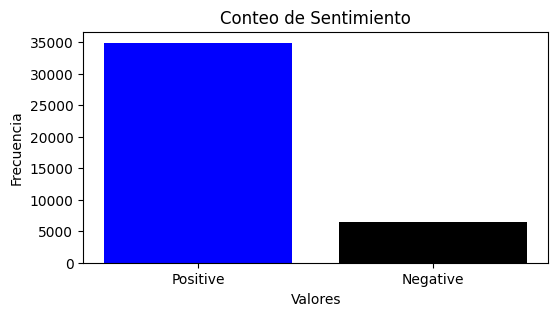

In [208]:
#Grafica de los valores Positivos y Negativos
value_counts = df['sentiment_analysis'].value_counts()

plt.figure(figsize=(6, 3))
#Crea un grafico de barras
plt.bar(value_counts.index, value_counts.values, color=['blue','black'])

#titulo y titulo de ejes
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Conteo de Sentimiento')
plt.show()


### Funcion **developer_reviews_analysis()**

In [209]:
def developer_reviews_analysis(desarrollador : str):
    # Filtrar el DataFrame por el año proporcionado
    df_filtered = df[df['developer'] == desarrollador]
    
    # Contar la cantidad de registros por cada análisis de sentimiento
    resultados = df_filtered['sentiment_analysis'].value_counts()
    
    # Si algún análisis de sentimiento está ausente, añádelo con 0
    for sentimiento in ['Negative', 'Positive']:
        if sentimiento not in resultados:
            resultados[sentimiento] = 0
    
    # Almacenar los resultados en una lista de tuplas
    resultados_lista = [(sentimiento, cantidad) for sentimiento, cantidad in resultados.items()]
    lista = ['Negative = '+str(resultados.iloc[1]),  'Positive = '+str(resultados.iloc[0]) ]
    

    #print(*lista, sep=",")
    return {desarrollador : lista}

In [210]:
developer_reviews_analysis('Valve')

{'Valve': ['Negative = 973', 'Positive = 7566']}